In [154]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

In [155]:
df = pd.read_csv('Data/precios-en-surtidor-resolucin-3142016.csv')


In [156]:
df.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [157]:
# Creo el indice con la serie indice_tiempo!!

df = pd.read_csv('Data/precios-en-surtidor-resolucin-3142016.csv', parse_dates=['indice_tiempo'], index_col='indice_tiempo')

In [158]:
df.head()

,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
indice_tiempo,,,,,,,,,,,,,,,,,,
2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [159]:
display(df.producto.value_counts())
display(df.idproducto.value_counts())

Gas Oil Grado 2                     8443
Nafta (súper) entre 92 y 95 Ron     8425
Nafta (premium) de más de 95 Ron    8034
Gas Oil Grado 3                     8027
GNC                                 3701
Name: producto, dtype: int64

19    8443
2     8425
3     8034
21    8027
6     3701
Name: idproducto, dtype: int64

In [160]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

idempresa              0
cuit                   0
empresa                0
direccion             14
localidad              0
provincia              0
region              4031
idproducto             0
producto               0
idtipohorario          0
tipohorario            0
precio                 0
fecha_vigencia         0
idempresabandera       0
empresabandera         0
latitud              186
longitud             186
geojson              186
dtype: int64


In [161]:
#Primero elimino la region que veo que me falta el 50% de los datos, o hay regiones no identificadas.
df.drop(columns=['region'], inplace=True)

In [162]:
#Elimino los datos faltantes, que no tienen coordenadas.
df.dropna(inplace=True)

In [163]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

idempresa           0
cuit                0
empresa             0
direccion           0
localidad           0
provincia           0
idproducto          0
producto            0
idtipohorario       0
tipohorario         0
precio              0
fecha_vigencia      0
idempresabandera    0
empresabandera      0
latitud             0
longitud            0
geojson             0
dtype: int64


In [164]:
display(df.columns)
display(df.dtypes)

Index(['idempresa', 'cuit', 'empresa', 'direccion', 'localidad', 'provincia',
       'idproducto', 'producto', 'idtipohorario', 'tipohorario', 'precio',
       'fecha_vigencia', 'idempresabandera', 'empresabandera', 'latitud',
       'longitud', 'geojson'],
      dtype='object')

idempresa             int64
cuit                 object
empresa              object
direccion            object
localidad            object
provincia            object
idproducto            int64
producto             object
idtipohorario         int64
tipohorario          object
precio              float64
fecha_vigencia       object
idempresabandera      int64
empresabandera       object
latitud             float64
longitud            float64
geojson              object
dtype: object

In [165]:
# Creamos una máscara y la aplicamos al dataframe anterior para traer los registros que necesitamos
nafta_premium = df.loc[(df.idproducto == 3) & (df.precio < 200), :]

# Para Gas Oil
gas_oil = df.loc[(df.idproducto == 19) & (df.precio < 200), :]
# Para Super
nafta_super = df.loc[(df.idproducto == 2) & (df.precio < 200), :]
# Para Super
gas_oil_premium= df.loc[(df.idproducto == 21) & (df.precio < 200), :]

# Chequeamos cómo quedaron los datos
nafta_premium.head(3)

,idempresa,cuit,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
indice_tiempo,,,,,,,,,,,,,,,,,
2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,3,Nafta (premium) de más de 95 Ron,2,Diurno,17.27,2017-04-06 20:54:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,3,Nafta (premium) de más de 95 Ron,3,Nocturno,17.27,2017-04-06 20:54:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
2021-02-01,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,3,Nafta (premium) de más de 95 Ron,2,Diurno,95.70,2021-02-15 00:00:00,2,YPF,-33.679540,-65.469880,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."


In [166]:
nafta_premium.precio.dtypes

dtype('float64')

<AxesSubplot:xlabel='precio'>

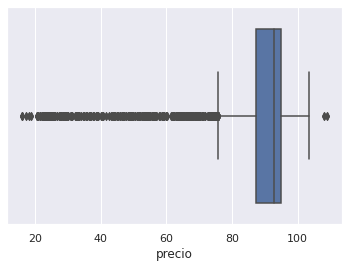

In [167]:
sns.boxplot(x=nafta_premium['precio'])

<AxesSubplot:xlabel='precio'>

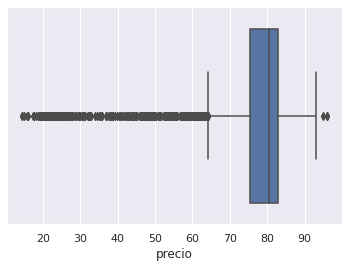

In [168]:
sns.boxplot(x=nafta_super['precio'])

<AxesSubplot:xlabel='precio'>

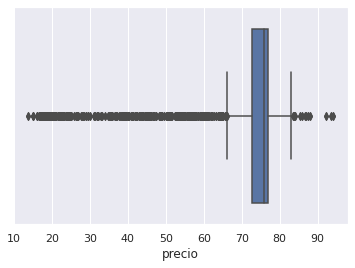

In [169]:
sns.boxplot(x=gas_oil['precio'])

<AxesSubplot:xlabel='precio'>

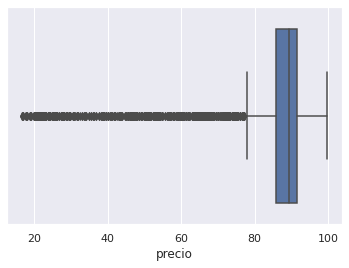

In [170]:
sns.boxplot(x=gas_oil_premium['precio'])

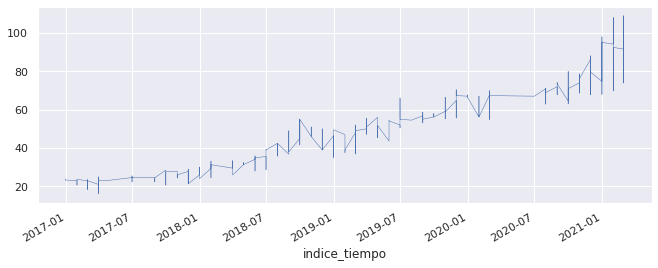

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
nafta_premium['precio'].plot(linewidth=0.5);

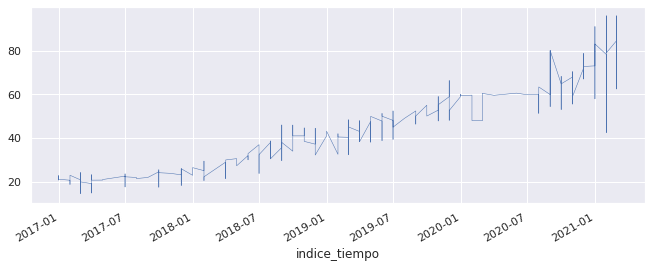

In [172]:
sns.set(rc={'figure.figsize':(11, 4)})
nafta_super['precio'].plot(linewidth=0.5);

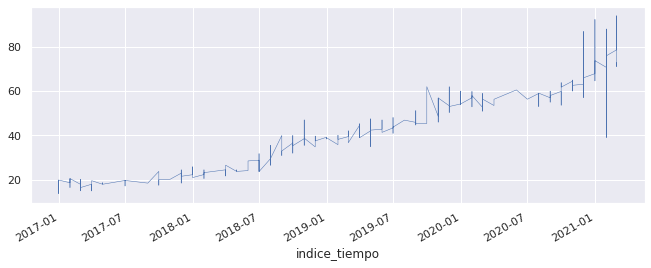

In [173]:
sns.set(rc={'figure.figsize':(11, 4)})
gas_oil['precio'].plot(linewidth=0.5);

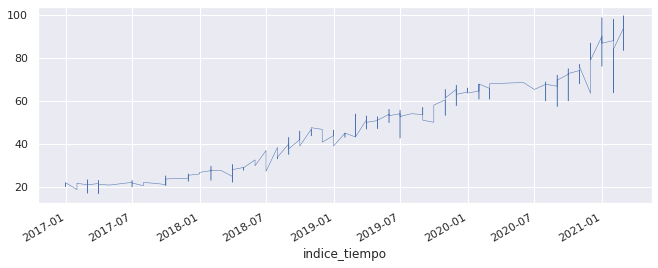

In [174]:
sns.set(rc={'figure.figsize':(11, 4)})
gas_oil_premium['precio'].plot(linewidth=0.5);

In [175]:
# Datos de Nafta Premiun
nafta_premium.to_csv(path_or_buf='Data/nafta_premium.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de Nafta Super
nafta_premium.to_csv(path_or_buf='Data/nafta_super.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de Gas Oil
nafta_premium.to_csv(path_or_buf='Data/gas_oil.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de Gas Oil Premium
nafta_premium.to_csv(path_or_buf='Data/gas_oil_premium.csv', sep=',',
                   header=True, encoding='utf8', index=False)

In [176]:
# Función que plotea la serie:
#def plot_df(nafta_premium, x, y, title="", xlabel='Fecha', ylabel='Precio', dpi=100):
#    plt.figure(figsize=(16,5), dpi=dpi)
#    plt.plot(x, y, color='tab:blue')
#    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#    plt.show()

#plot_df(nafta_premium, x=nafta_premium.index, y=nafta_premium.precio,\
#        title='Precio del combustible')